# 1. Import and Install Dependencies

In [2]:
pip install opencv-python 

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 5.3 MB/s eta 0:00:08
   ---------------------------------------- 0.3/38.8 MB 4.2 MB/s eta 0:00:10
   ---------------------------------------- 0.3/38.8 MB 4.2 MB/s eta 0:00:10
   ---------------------------------------- 0.3/38.8 MB 4.2 MB/s eta 0:00:10
   ---------------------------------------- 0.4/38.8 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.8 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.4/38.8 MB 2.1 MB/s eta 0:00:19
   ---------------------------------------- 0.5/38.8 MB 1.4 MB/s eta 0:00:27
    --------------------------------------- 0.5/38.8 MB 1.4 MB/s eta 0:00:28
    --------------------------------------- 0.6/38.8 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.6/38.8 MB 1.5 MB/s eta 0:00:26
   


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install mediapipe 

  Using cached mediapipe-0.10.14-cp311-cp311-win_amd64.whl.metadata (9.9 kB)
   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.8 MB 1.5 MB/s eta 0:00:35
   ---------------------------------------- 0.1/50.8 MB 1.5 MB/s eta 0:00:35
   ---------------------------------------- 0.1/50.8 MB 1.5 MB/s eta 0:00:35
   ---------------------------------------- 0.2/50.8 MB 981.9 kB/s eta 0:00:52
   ---------------------------------------- 0.4/50.8 MB 1.3 MB/s eta 0:00:38
   ---------------------------------------- 0.5/50.8 MB 1.6 MB/s eta 0:00:33
    --------------------------------------- 0.7/50.8 MB 1.8 MB/s eta 0:00:28
    --------------------------------------- 0.8/50.8 MB 2.0 MB/s eta 0:00:25
    --------------------------------------- 1.0/50.8 MB 2.2 MB/s eta 0:00:23
    --------------------------------------- 1.0/50.8 MB 2.2 MB/s eta 0:00:23
    -------


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

### This is for opening and captuing video through webcam

In [3]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils

In [4]:
def draw_landmarks(image, results):
    # Draw face mesh connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.face_landmarks,
        connections=mp.solutions.face_mesh_connections.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1)
    )
    
    # Draw pose connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.pose_landmarks,
        connections=mp.solutions.pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2)
    )
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.left_hand_landmarks,
        connections=mp.solutions.hands.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2)
    )
    
    # Draw right hand connections
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=results.right_hand_landmarks,
        connections=mp.solutions.hands.HAND_CONNECTIONS,
        landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
        connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2)
    )

In [5]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

c:\Users\joths\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
len(results.face_landmarks.landmark)

468

In [7]:
len(results.pose_landmarks.landmark)

33

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

In [10]:
frame

array([[[ 91,  76,  54],
        [ 93,  79,  57],
        [ 86,  74,  52],
        ...,
        [ 76,  84,  90],
        [ 75,  86,  91],
        [ 73,  86,  91]],

       [[ 91,  76,  55],
        [ 92,  78,  57],
        [ 87,  75,  53],
        ...,
        [ 78,  88,  93],
        [ 76,  88,  93],
        [ 72,  85,  91]],

       [[ 91,  75,  56],
        [ 90,  75,  56],
        [ 87,  75,  54],
        ...,
        [ 79,  91,  96],
        [ 76,  90,  96],
        [ 71,  84,  92]],

       ...,

       [[ 45,  61, 178],
        [ 44,  61, 178],
        [ 39,  56, 175],
        ...,
        [ 29,  21,   8],
        [ 30,  21,  10],
        [ 30,  21,  10]],

       [[ 42,  61, 176],
        [ 42,  61, 176],
        [ 35,  55, 170],
        ...,
        [ 31,  23,  10],
        [ 31,  23,  10],
        [ 30,  22,  10]],

       [[ 41,  61, 176],
        [ 40,  60, 175],
        [ 34,  54, 168],
        ...,
        [ 33,  26,  11],
        [ 31,  23,  10],
        [ 29,  21,   8]]

In [11]:
frame.shape

(480, 640, 3)

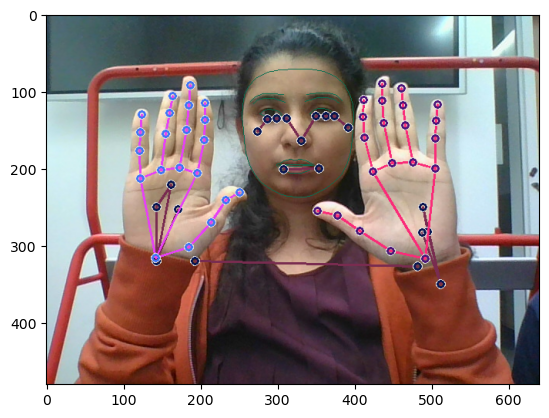

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.right_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
if results.face_landmarks:
    # Extract x, y, z coordinates for all 468 face landmarks (468 * 3 = 1404)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
else:
    # If no face landmarks detected, return zero array of same size
    face = np.zeros(1404)

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test.shape

(1662,)

In [21]:
result_test

array([ 0.51833445,  0.34310025, -0.84597522, ...,  0.19469088,
        0.27193716, -0.04915933])

In [115]:
468*3+33*4+21*3+21*3

1662

In [22]:
np.save('0', result_test)

In [23]:
np.load('0.npy')

array([ 0.51833445,  0.34310025, -0.84597522, ...,  0.19469088,
        0.27193716, -0.04915933])

# 4. Setup Folders for Collection

In [5]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','how','today','cooking','you','weather','what','name','fine','your'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [6]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [35]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

c:\Users\joths\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [36]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
label_map = {label:num for num, label in enumerate(actions)}

In [9]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'how': 3,
 'today': 4,
 'cooking': 5,
 'you': 6,
 'weather': 7,
 'what': 8,
 'name': 9,
 'fine': 10,
 'your': 11}

In [40]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [41]:
np.array(sequences).shape

(360, 30, 1662)

In [42]:
np.array(labels).shape

(360,)

In [43]:
X = np.array(sequences)

In [44]:
X.shape

(360, 30, 1662)

In [45]:
y = to_categorical(labels).astype(int)

In [46]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [48]:
X_train.shape

(342, 30, 1662)

In [116]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

c:\Users\joths\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [50]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [3]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\joths\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'actions' is not defined

In [54]:
res = [.7, 0.2, 0.1,0.2,0.9,0.3,0.4,0.5,0.7,0.8,0.5,0.1]

In [55]:
actions[np.argmax(res)]

'today'

In [56]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [57]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - categorical_accuracy: 0.0701 - loss: 3.2629
Epoch 2/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - categorical_accuracy: 0.0763 - loss: 2.4812
Epoch 3/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - categorical_accuracy: 0.1417 - loss: 2.3820
Epoch 4/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - categorical_accuracy: 0.1331 - loss: 2.3715
Epoch 5/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - categorical_accuracy: 0.1243 - loss: 2.1892
Epoch 6/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - categorical_accuracy: 0.1906 - loss: 2.1371
Epoch 7/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - categorical_accuracy: 0.2465 - loss: 2.0611
Epoch 8/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - categorical_accuracy: 0.2237 - loss: 1.9791
Epoch 9/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - categorical_accuracy: 0.3045 - loss: 1.8504
Epoch 10/2000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - categorical_accuracy: 0.3464 - loss: 1.7161
Epoch 11/

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,918 (6.83 MB)

 Trainable params: 596,972 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,946 (4.55 MB)

# 8. Make Predictions

In [59]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step


In [60]:
actions[np.argmax(res[1])]

'hello'

In [61]:
actions[np.argmax(y_test[1])]

'thanks'

# 9. Save Weights

In [62]:
model.save('action.h5')

In [217]:
del model

In [1]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[16,  1],
        [ 0,  1]],

       [[13,  1],
        [ 2,  2]],

       [[16,  0],
        [ 0,  2]],

       [[16,  0],
        [ 0,  2]],

       [[17,  1],
        [ 0,  0]],

       [[16,  1],
        [ 0,  1]],

       [[15,  0],
        [ 1,  2]],

       [[16,  0],
        [ 1,  1]],

       [[16,  0],
        [ 1,  1]],

       [[16,  1],
        [ 0,  1]]], dtype=int64)

In [68]:
accuracy_score(ytrue, yhat)

0.7222222222222222

# 11. Test in Real Time

In [69]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [70]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [71]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [72]:
len(sequence)

TypeError: object of type 'int' has no len()

In [51]:
sequence.append('def')

In [34]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [75]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

: 

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [143]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.0025676 , 0.48050928, 0.5169231 ]], dtype=float32)